# Computer Vision : Count the number of connected components

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Dry run

        - Read Image and pre-process it
            - resize it to 15x20
            - convert it into binary threshold matrix

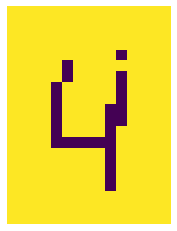

In [2]:
img = cv2.imread('demo.png',cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (15, 20))
thresh = 128
img_binary = cv2.threshold(img, thresh, 1, cv2.THRESH_BINARY)[1]
plt.figure(figsize=(4,4))
plt.axis("off")
plt.imshow(img_binary)
plt.show()

In [3]:
# Binary matrix
img_binary

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1,

In [4]:
img_binary.shape

(20, 15)

In [5]:
import collections
# Eq class by disjoint set
class UnionFind:
    def __init__(self):
        self.leaders = collections.defaultdict(lambda: None)
    def find(self, x):
        # find leaders
        l = self.leaders[x]
        if l is not None:
            l = self.find(l)
            self.leaders[x] = l
            return l
        return x
    def union(self, x, y):
        # union and assign leaders 
        lx, ly = self.find(x), self.find(y)
        if lx != ly:
            self.leaders[lx] = ly
    def get_groups(self):
        # eq classes
        groups = collections.defaultdict(set)
        for x in self.leaders:
            groups[self.find(x)].add(x)
        return list(groups.values())
    
# Algorithm
def scan(img_binary):
    # Initilize a matrix equal to size of the image to mark 
    scan_one = np.zeros(img_binary.shape,dtype=np.int8)
    # To keep track of numbers used
    count = 0
    eq_pairs = set()
    # first scan
    for i in range(img_binary.shape[0]):
        for j in range(img_binary.shape[1]):
            if(img_binary[i][j] == 0):
                # If we have choice to inherit both rigth and above
                if(scan_one[max(0,i-1)][j] != 0 and scan_one[i][max(0,j-1)] != 0 ):
                        eq_pairs.add((scan_one[max(0,i-1)][j],scan_one[i][max(0,j-1)]))
                        scan_one[i][j] = scan_one[max(0,i-1)][j]
                # If we have chance to inherit right
                elif(scan_one[max(0,i-1)][j] != 0):
                    scan_one[i][j] = scan_one[max(0,i-1)][j]
                # If we have chance to inherit above
                elif(scan_one[i][max(0,j-1)] != 0):
                    scan_one[i][j] = scan_one[i][max(0,j-1)]
                # New value
                else:
                    scan_one[i][j] = count+1
                    count+=1
                    eq_pairs.add((scan_one[i][j],scan_one[i][j]))
    # eq pair generation
    uf = UnionFind()
    for (a, b) in eq_pairs:
        uf.union(a, b)
    return eq_pairs,scan_one,uf

In [6]:
# Theory representation
test_pairs,matrix,cls = scan(img_binary)
for i in matrix:
    for j in i:
        if(j == 0):
            print('',end='  ')
        else:
            print(j,end=' ')
    print()

                              
                              
                              
                              
                    1         
          2                   
          2         3         
        4           3         
        4           3         
        4         5 3         
        4         5 3         
        4         5           
        4 4 4 4 4 5           
                  5           
                  5           
                  5           
                  5           
                              
                              
                              


In [7]:
# eq pairs
print(test_pairs)

{(4, 4), (5, 5), (1, 1), (5, 4), (3, 3), (2, 2), (3, 5)}


In [8]:
print("Number of components : " + str(len(cls.get_groups())))
print("Components : " , cls.get_groups())

Number of components : 3
Components :  [{3, 4, 5}, {1}, {2}]


## Application 

    - find number of moves completed in tic/tac/toe game using component labeling.

In [9]:
# read and preprocess
def ttt(path):
    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (200, 200))
    thresh = 200
    img_binary = cv2.threshold(img, thresh, 1, cv2.THRESH_BINARY)[1]
    plt.figure(figsize=(4,4))
    plt.axis("off")
    plt.imshow(img_binary)
    plt.show()
    print("Number of moves done : ",len(scan(img_binary)[2].get_groups())-1)

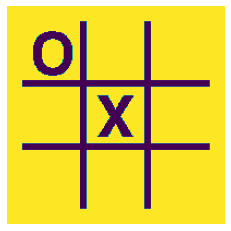

Number of moves done :  2


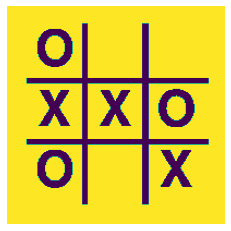

Number of moves done :  6


In [10]:
# test
import os
for img in os.listdir('data'):
    ttt('data/'+img)